### Import and Read Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import joblib

In [2]:
# scikit-learn / XGBoost / imbalanced-learn / imbpipeline


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

In [4]:
# Load data

df = pd.read_csv('PCOS_data_cleaned.csv')

In [5]:
# Quick look at column names and first few rows

print(df.shape)
display(df.head())

(541, 45)


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


### Take an overall look at the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### Descriptive Statistics

In [7]:
all_columns_stats = df.describe()
print("Descriptive statistics for all columns:")
print(all_columns_stats)

Descriptive statistics for all columns:
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.311285    13.802218         73.247689   
std       6.033545    4.056399     1.840812          4.430285   
min     137.000

### Convert to numeric

In [8]:
# Convert the columns to numeric, replacing non-numeric values with NaN
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

### Checking Missing Values in DataFrame

In [9]:
print(df.isnull().sum())

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

### Data Preprocessing

#### 1. Drop columns that are not needed

In [10]:
df = df.drop(['Unnamed: 44', 'Sl. No', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'Patient File No.', 'Cycle(R/I)'], axis=1)

#### 2. Fix spelling mistakes

In [11]:
df.columns = df.columns.str.strip().str.replace('Marraige', 'Marriage')
df.columns = df.columns.str.strip().str.replace('No. of aborptions', 'No. of Abortions')

#### 3. Fill in missing values

In [12]:
# Fill "Marriage Status (Yrs)" with the median
df['Marriage Status (Yrs)'] = df['Marriage Status (Yrs)'].fillna(df['Marriage Status (Yrs)'].median())

# Fill "Fast food (Y/N)" with the mode
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0])

#### 4. Turning 'Fast Food' back to int

In [13]:
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].astype(int)

#### 5. Non-numeric column check

In [14]:
# Check for non-numeric columns in the DataFrame
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['Fast food (Y/N)'], dtype='object')


#### 6. Analyzing Outliers

In [15]:
# Function to detect and count outliers using IQR method
def detect_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier bounds (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    return outliers

# Loop through all numeric columns in the dataframe and check for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get all numeric columns

# Initialize a set to track unique rows affected by outliers
outlier_rows = set()

# Loop through columns to accumulate rows with outliers
for column in numeric_columns:
    outliers = detect_outliers(df, column)
    if not outliers.empty:
        # Add the index of affected rows to the set
        outlier_rows.update(outliers.index)

# Print the overall number of affected rows
print(f"Total number of rows affected by outliers: {len(outlier_rows)}")

Total number of rows affected by outliers: 430


#### Looking at the rows affected by the outliers in every column

In [16]:
# Function to detect and count outliers using IQR method
def detect_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier bounds (1.5 times the IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    # Print column name and number of outliers
    if not outliers.empty:
        print(f"Outliers detected in column '{column_name}': {outliers.shape[0]} rows affected")
    else:
        print(f"No outliers detected in column '{column_name}'.")

# Step 2: Loop through all numeric columns in the dataframe and check for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Get all numeric columns
for column in numeric_columns:
    detect_outliers(df, column)

No outliers detected in column 'PCOS (Y/N)'.
Outliers detected in column 'Age (yrs)': 5 rows affected
Outliers detected in column 'Weight (Kg)': 18 rows affected
Outliers detected in column 'Height(Cm)': 6 rows affected
Outliers detected in column 'BMI': 12 rows affected
No outliers detected in column 'Blood Group'.
Outliers detected in column 'Pulse rate(bpm)': 94 rows affected
Outliers detected in column 'RR (breaths/min)': 14 rows affected
Outliers detected in column 'Hb(g/dl)': 8 rows affected
Outliers detected in column 'Cycle length(days)': 77 rows affected
Outliers detected in column 'Marriage Status (Yrs)': 11 rows affected
No outliers detected in column 'Pregnant(Y/N)'.
Outliers detected in column 'No. of Abortions': 104 rows affected
Outliers detected in column 'FSH(mIU/mL)': 12 rows affected
Outliers detected in column 'LH(mIU/mL)': 24 rows affected
Outliers detected in column 'FSH/LH': 48 rows affected
Outliers detected in column 'Hip(inch)': 21 rows affected
Outliers detec

#### Removing specific outliers after thorough analysis

In [17]:
# (1) Clean up non-numeric values and convert to numeric
df_cleaned = df.copy()

# Convert 'AMH(ng/mL)' to numeric, coercing errors to NaN
df_cleaned['AMH(ng/mL)'] = pd.to_numeric(df_cleaned['AMH(ng/mL)'], errors='coerce')

# (2) Fill NaN values with the median of the column
df_cleaned['AMH(ng/mL)'] = df_cleaned['AMH(ng/mL)'].fillna(df_cleaned['AMH(ng/mL)'].median())

# (3) Remove rows with problematic values (if any) in other columns
df_cleaned = df_cleaned[~df_cleaned['Pulse rate(bpm)'].isin([13, 18])]
df_cleaned = df_cleaned[df_cleaned['Cycle length(days)'] != 0]
df_cleaned = df_cleaned[df_cleaned['FSH(mIU/mL)'] != 5032]
df_cleaned = df_cleaned[df_cleaned['LH(mIU/mL)'] != 2018.0]
df_cleaned = df_cleaned[df_cleaned['TSH (mIU/L)'] != 65]
df_cleaned = df_cleaned[~df_cleaned['Vit D3 (ng/mL)'].isin([6014.66, 5418.6])]
df_cleaned = df_cleaned[~df_cleaned['PRG(ng/mL)'].isin([85, 25.3])]
df_cleaned = df_cleaned[df_cleaned['BP _Systolic (mmHg)'] != 12]
df_cleaned = df_cleaned[df_cleaned['BP _Diastolic (mmHg)'] != 8]
df_cleaned = df_cleaned[df_cleaned['Endometrium (mm)'] != 0]

# (4) Overwrite df with the cleaned version
df = df_cleaned.copy()

In [18]:
df['PCOS (Y/N)'].value_counts()
X=df.drop(["PCOS (Y/N)"],axis = 1)
y=df["PCOS (Y/N)"]

### After Cleaning

In [19]:
print("After cleaning:", df.shape)
df.info()

After cleaning: (529, 39)
<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 0 to 540
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             529 non-null    int64  
 1   Age (yrs)              529 non-null    int64  
 2   Weight (Kg)            529 non-null    float64
 3   Height(Cm)             529 non-null    float64
 4   BMI                    529 non-null    float64
 5   Blood Group            529 non-null    int64  
 6   Pulse rate(bpm)        529 non-null    int64  
 7   RR (breaths/min)       529 non-null    int64  
 8   Hb(g/dl)               529 non-null    float64
 9   Cycle length(days)     529 non-null    int64  
 10  Marriage Status (Yrs)  529 non-null    float64
 11  Pregnant(Y/N)          529 non-null    int64  
 12  No. of Abortions       529 non-null    int64  
 13  FSH(mIU/mL)            529 non-null    float64
 14  LH(mIU/mL)             529 non-null  

### Separate clinical Vs non-clinical features

In [20]:
# Clinical features
clinical_features = [
    'Hb(g/dl)',
    'Pulse rate(bpm)',
    'FSH(mIU/mL)',
    'LH(mIU/mL)',
    'FSH/LH',
    'TSH (mIU/L)',
    'AMH(ng/mL)',
    'PRL(ng/mL)',
    'Vit D3 (ng/mL)',
    'PRG(ng/mL)',
    'RBS(mg/dl)',
    'Follicle No. (L)',
    'Follicle No. (R)',
    'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)',
    'Endometrium (mm)',
    'Blood Group',
    'RR (breaths/min)',
    'BP _Systolic (mmHg)'
    'BP _Diastolic (mmHg)',
]

# Non-clinical features
non_clinical_features = [
    'Age (yrs)',
    'Weight (Kg)',
    'Height(Cm)',
    'BMI',
    'Cycle length(days)',
    'Marriage Status (Yrs)',
    'Hip(inch)',
    'Waist(inch)',
    'Waist:Hip Ratio',
    'Pregnant(Y/N)',
    'No. of Abortions',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Fast food (Y/N)',
    'Reg.Exercise(Y/N)'
]

### Identifying numerical and categorical columns

In [21]:
categorical_columns = [
    'PCOS (Y/N)',
    'Blood Group',
    'Pregnant(Y/N)',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Fast food (Y/N)',
    'Reg.Exercise(Y/N)'
]

In [22]:
numerical_columns = [
    'Age (yrs)',
    'Weight (Kg)',
    'Height(Cm)',
    'BMI',
    'Pulse rate(bpm)',
    'Hb(g/dl)',
    'Cycle length(days)',
    'Marriage Status (Yrs)', 
    'FSH(mIU/mL)',
    'LH(mIU/mL)',
    'FSH/LH',
    'Hip(inch)',
    'Waist(inch)',
    'Waist:Hip Ratio',
    'TSH (mIU/L)',
    'AMH(ng/mL)',
    'PRL(ng/mL)',
    'Vit D3 (ng/mL)',
    'PRG(ng/mL)',
    'RBS(mg/dl)',
    'Follicle No. (L)',
    'Follicle No. (R)',
    'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)',
    'Endometrium (mm)',
    'RR (breaths/min)',   
    'No. of Abortions',           
    'BP _Systolic (mmHg)',        
    'BP _Diastolic (mmHg)'        
]

In [23]:
numerical_columns

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marriage Status (Yrs)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)',
 'RR (breaths/min)',
 'No. of Abortions',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)']

### EDA

#### 1. Feature Importance on Overall Features

C:\Users\preet\AppData\Local\Temp\ipykernel_11248\3193643910.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values[:20], y=feature_imp.index[:20], palette='viridis')


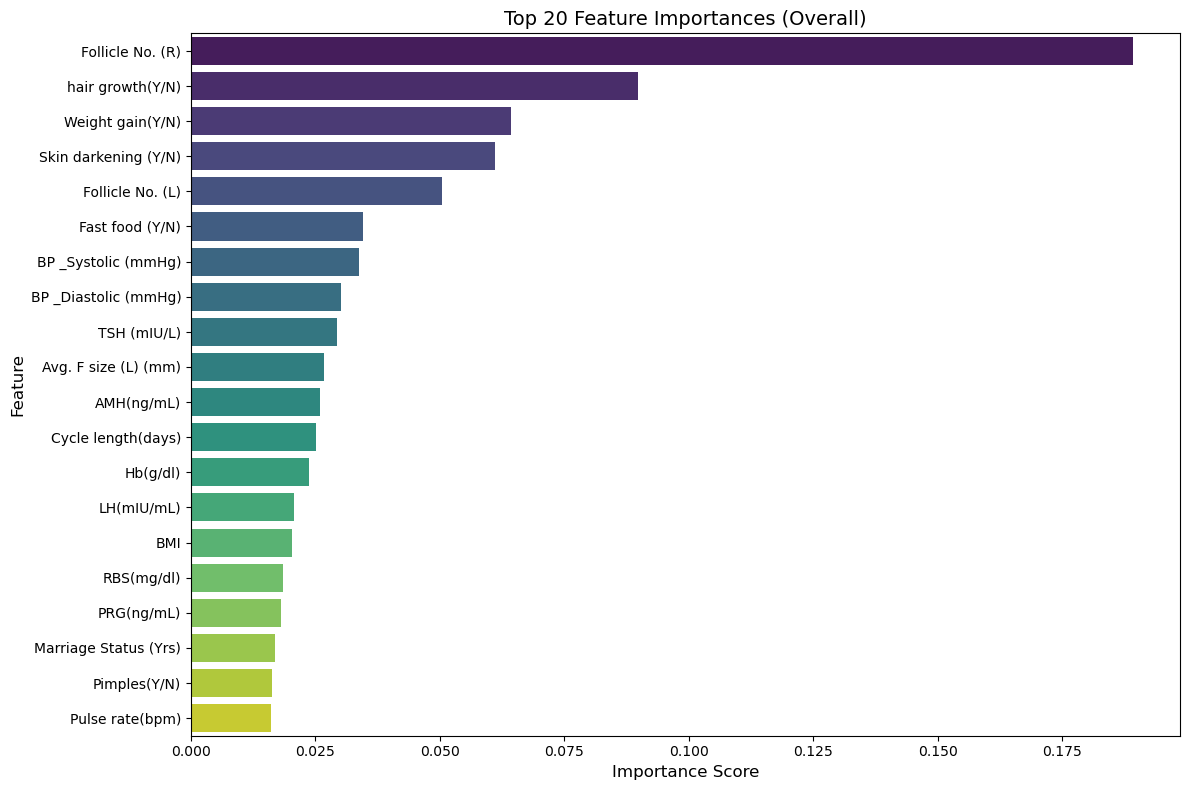

In [24]:
# Fit an XGBoost on the full feature set (no train/test split) just to rank importances
xgb_temp = XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')
xgb_temp.fit(X, y)

# Extract & sort feature importances
feature_imp = pd.Series(
    xgb_temp.feature_importances_,
    index = X.columns
).sort_values(ascending=False)

# Plot the top 20 features by importance
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp.values[:20], y=feature_imp.index[:20], palette='viridis')
plt.title("Top 20 Feature Importances (Overall)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

#### 2. Boxplot for each Numerical Column

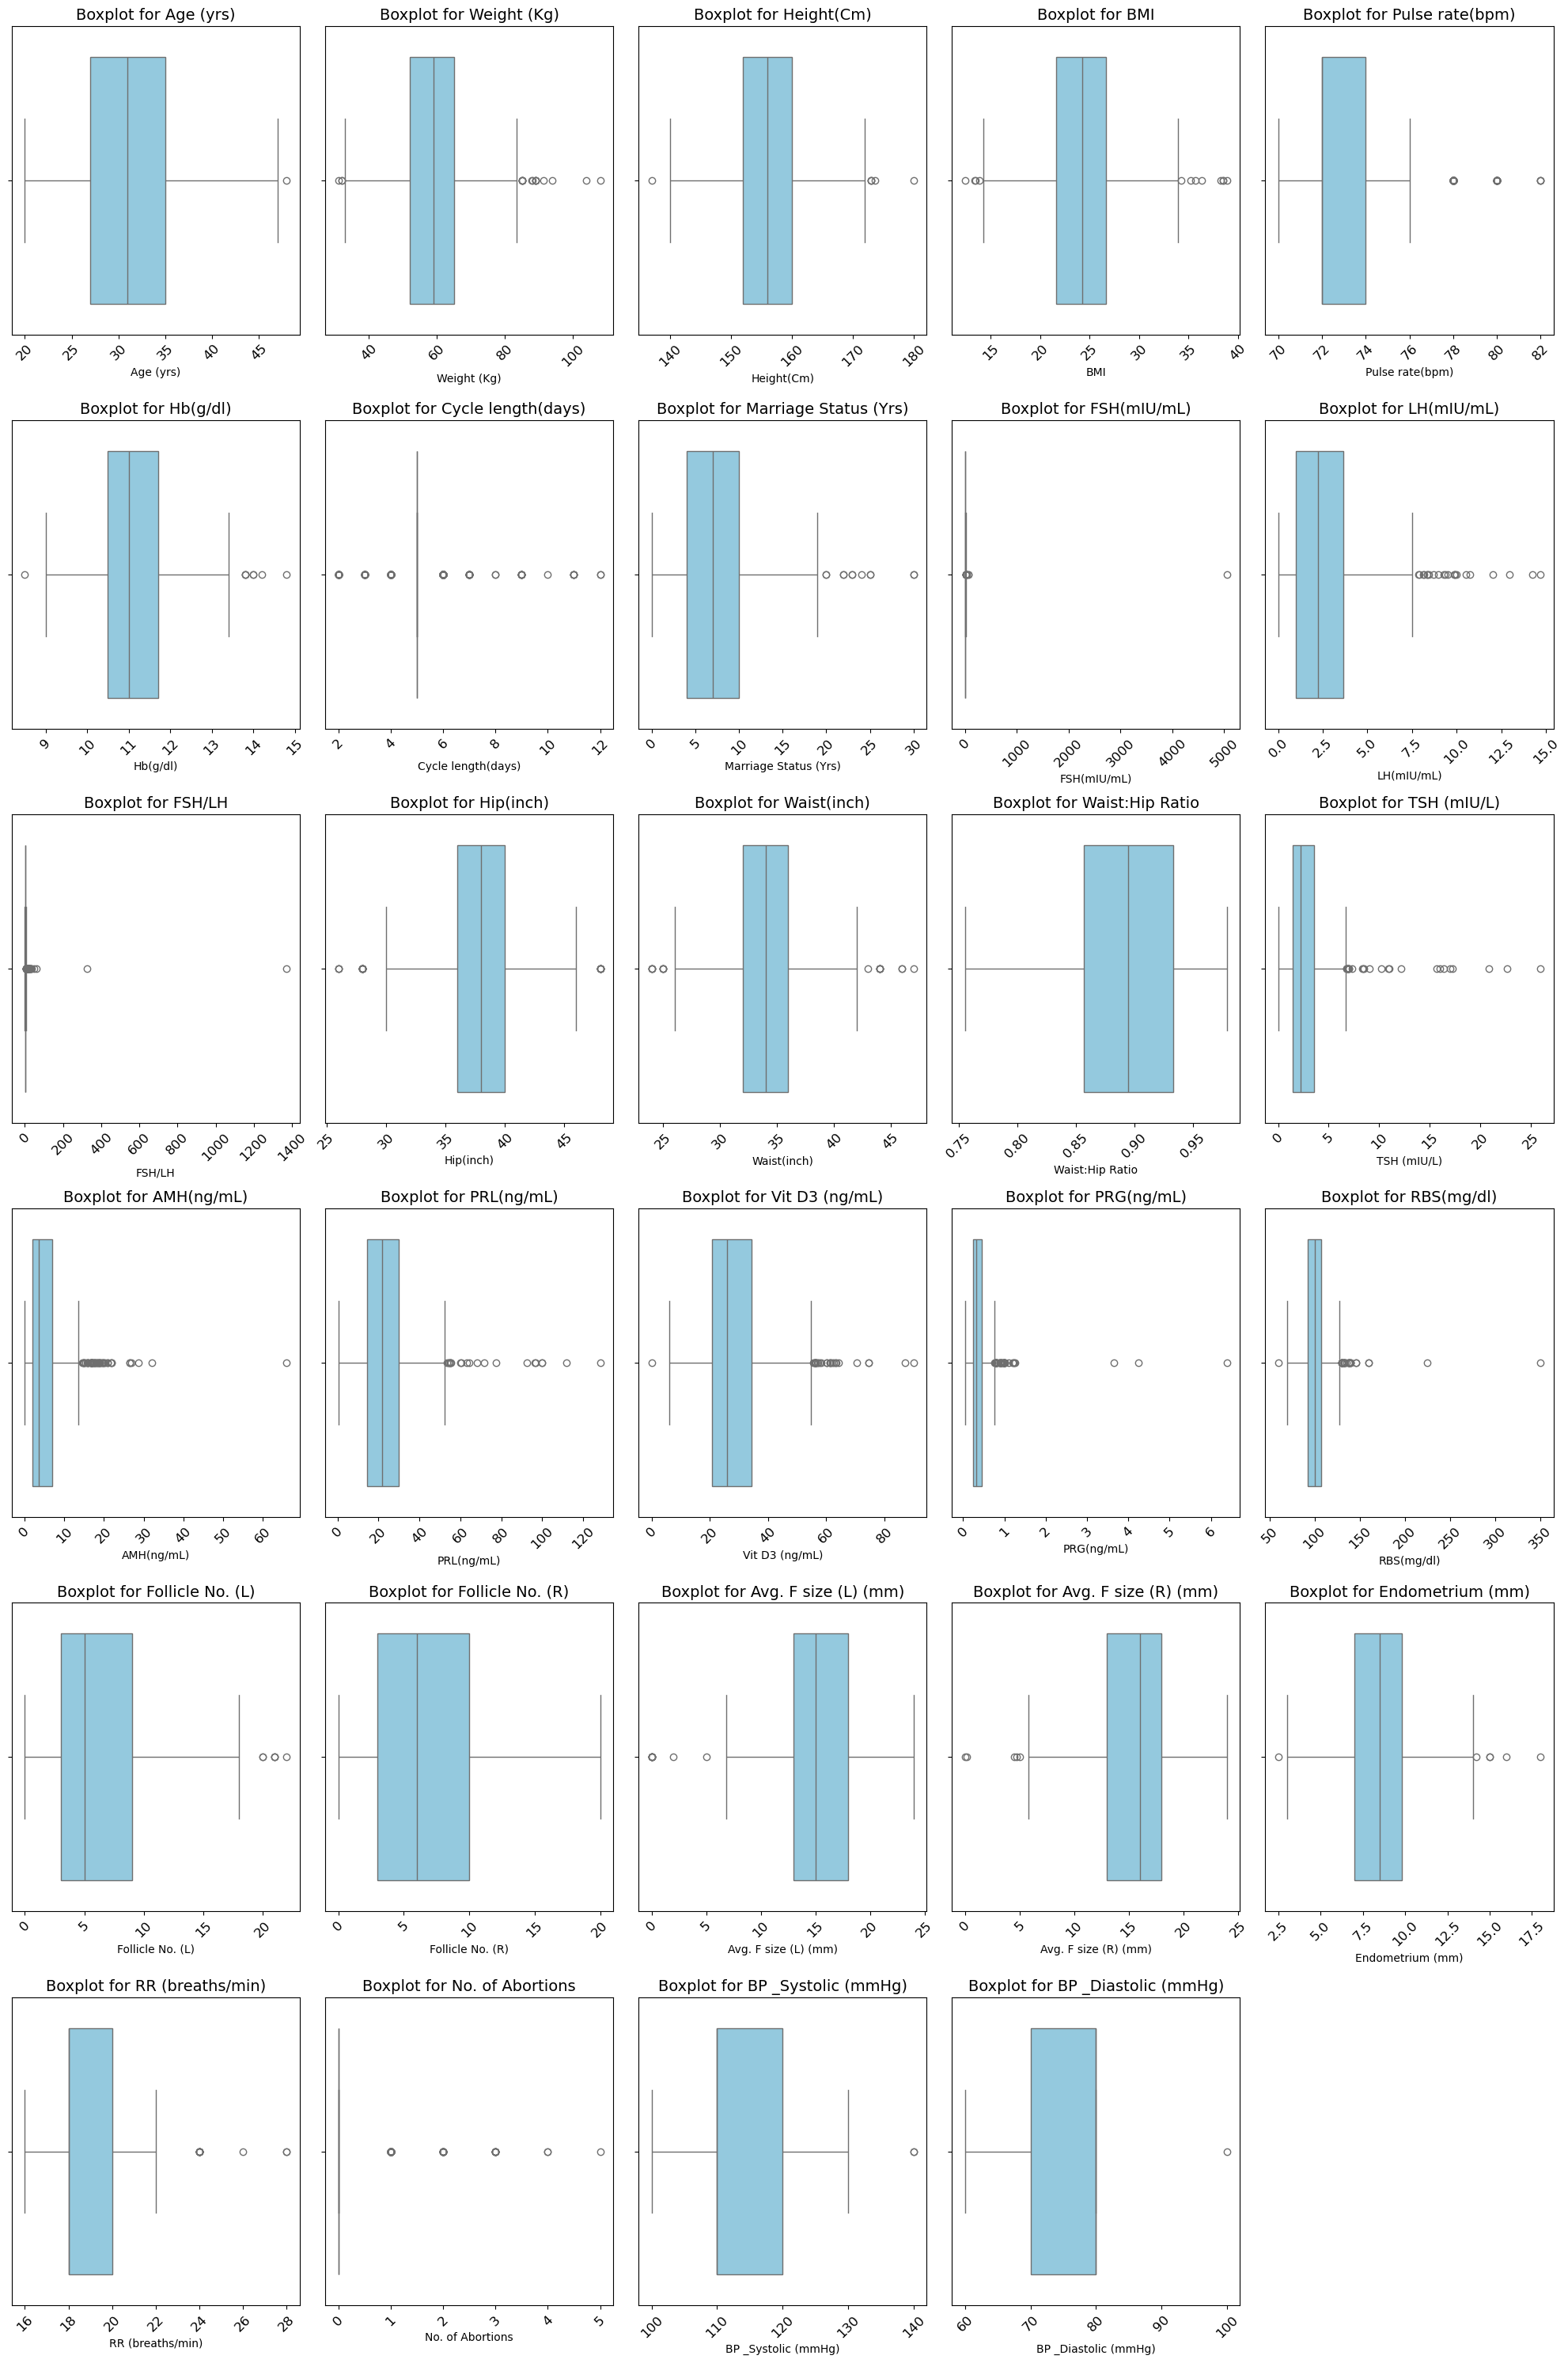

In [25]:
# Calculate the number of rows and columns required for subplots
num_plots = len(numerical_columns)
cols = 5  # Fixed number of columns
rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)  # Calculate rows based on number of plots

# Create boxplots for each numerical column with color
plt.figure(figsize=(20, 5 * rows))  # Adjust the figure height dynamically based on the number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df_cleaned, x=column, color='skyblue')  # Constant color
    plt.title(f"Boxplot for {column}", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### 3. PCOS Diagnosis Distribution: Counts of PCOS vs Non-PCOS Cases

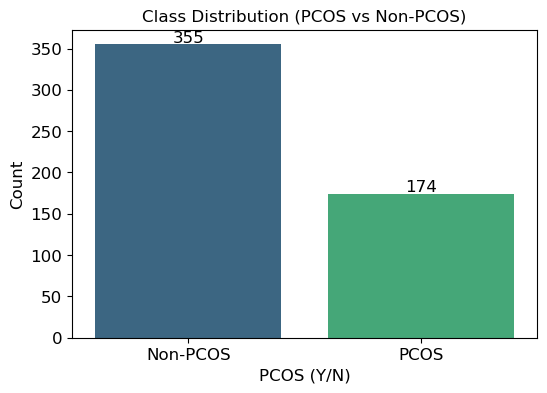

In [26]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='PCOS (Y/N)', data=df_cleaned, hue=df_cleaned['PCOS (Y/N)'].astype(str), palette='viridis', legend=False)

# Adding title and formatting for countplot
plt.title('Class Distribution (PCOS vs Non-PCOS)', fontsize=12)
plt.xlabel('PCOS (Y/N)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-PCOS', 'PCOS'], fontsize=12)
plt.yticks(fontsize=12)

# Adding count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 4. Barplot of [Variable] Categories vs PCOS Prevalence

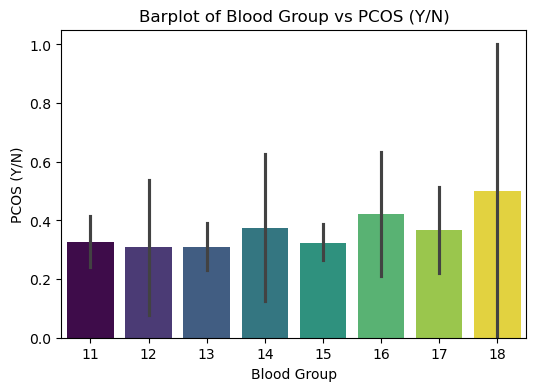

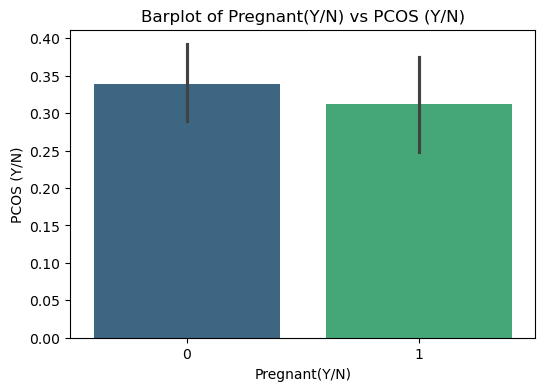

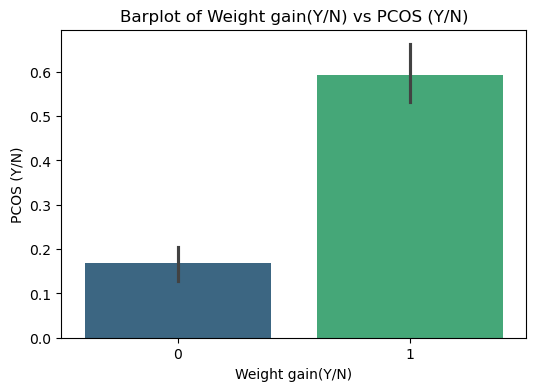

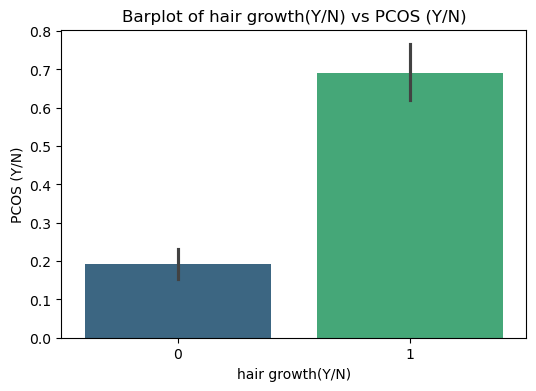

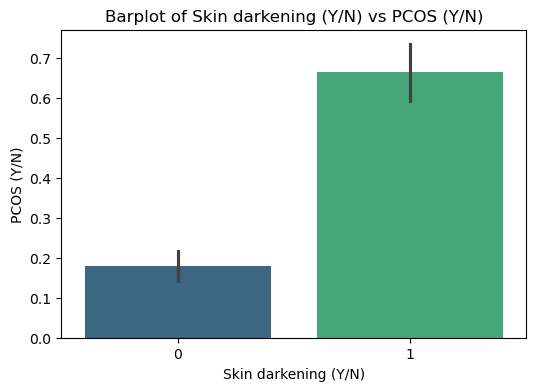

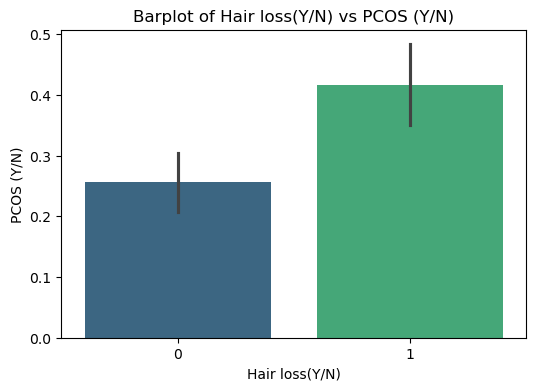

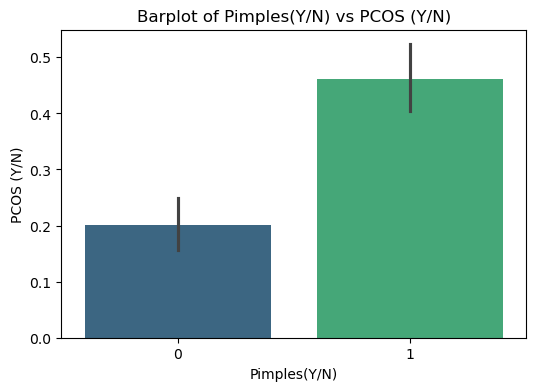

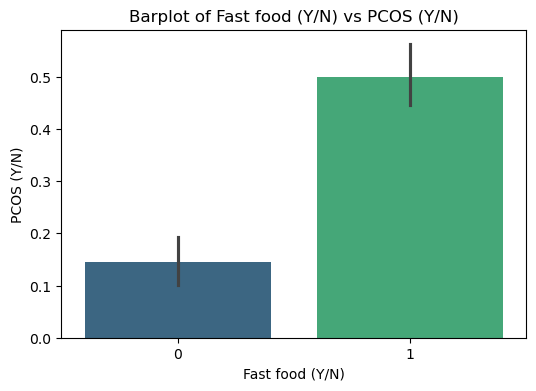

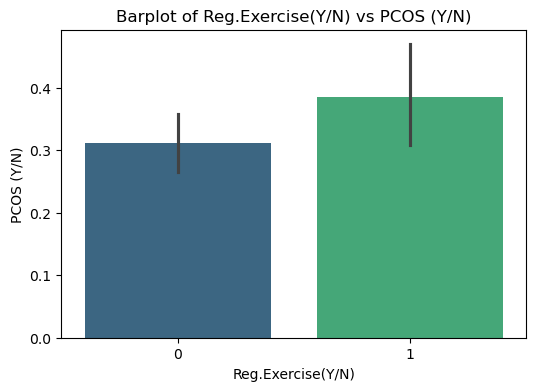

In [27]:
for x in categorical_columns:
    if x != "PCOS (Y/N)":
        plt.figure(figsize=(6, 4))
        sns.barplot(x=x, y="PCOS (Y/N)", hue=x, data=df_cleaned, palette='viridis', legend=False)
        plt.title(f'Barplot of {x} vs PCOS (Y/N)', fontsize=12)
        plt.show()

#### 5. Correlation Matrix

In [28]:
# Use only numerical columns
corr_matrix = df[numerical_columns].corr(method='pearson')

print(corr_matrix)

                       Age (yrs)  Weight (Kg)  Height(Cm)       BMI  \
Age (yrs)               1.000000    -0.022074   -0.117802  0.027754   
Weight (Kg)            -0.022074     1.000000    0.416509  0.903518   
Height(Cm)             -0.117802     0.416509    1.000000 -0.006440   
BMI                     0.027754     0.903518   -0.006440  1.000000   
Pulse rate(bpm)         0.056283     0.008126   -0.061958  0.029744   
Hb(g/dl)               -0.025852    -0.001984    0.008237 -0.001467   
Cycle length(days)      0.043786     0.006923    0.022090 -0.002168   
Marriage Status (Yrs)   0.659863     0.055440   -0.063375  0.094654   
FSH(mIU/mL)            -0.018145    -0.025721    0.032185 -0.041016   
LH(mIU/mL)             -0.151431    -0.002503    0.013073 -0.010212   
FSH/LH                  0.012334    -0.004537    0.023714 -0.012366   
Hip(inch)               0.002042     0.630785    0.210272  0.595758   
Waist(inch)             0.037911     0.640237    0.208360  0.608304   
Waist:

#### 6. Full Heatmap

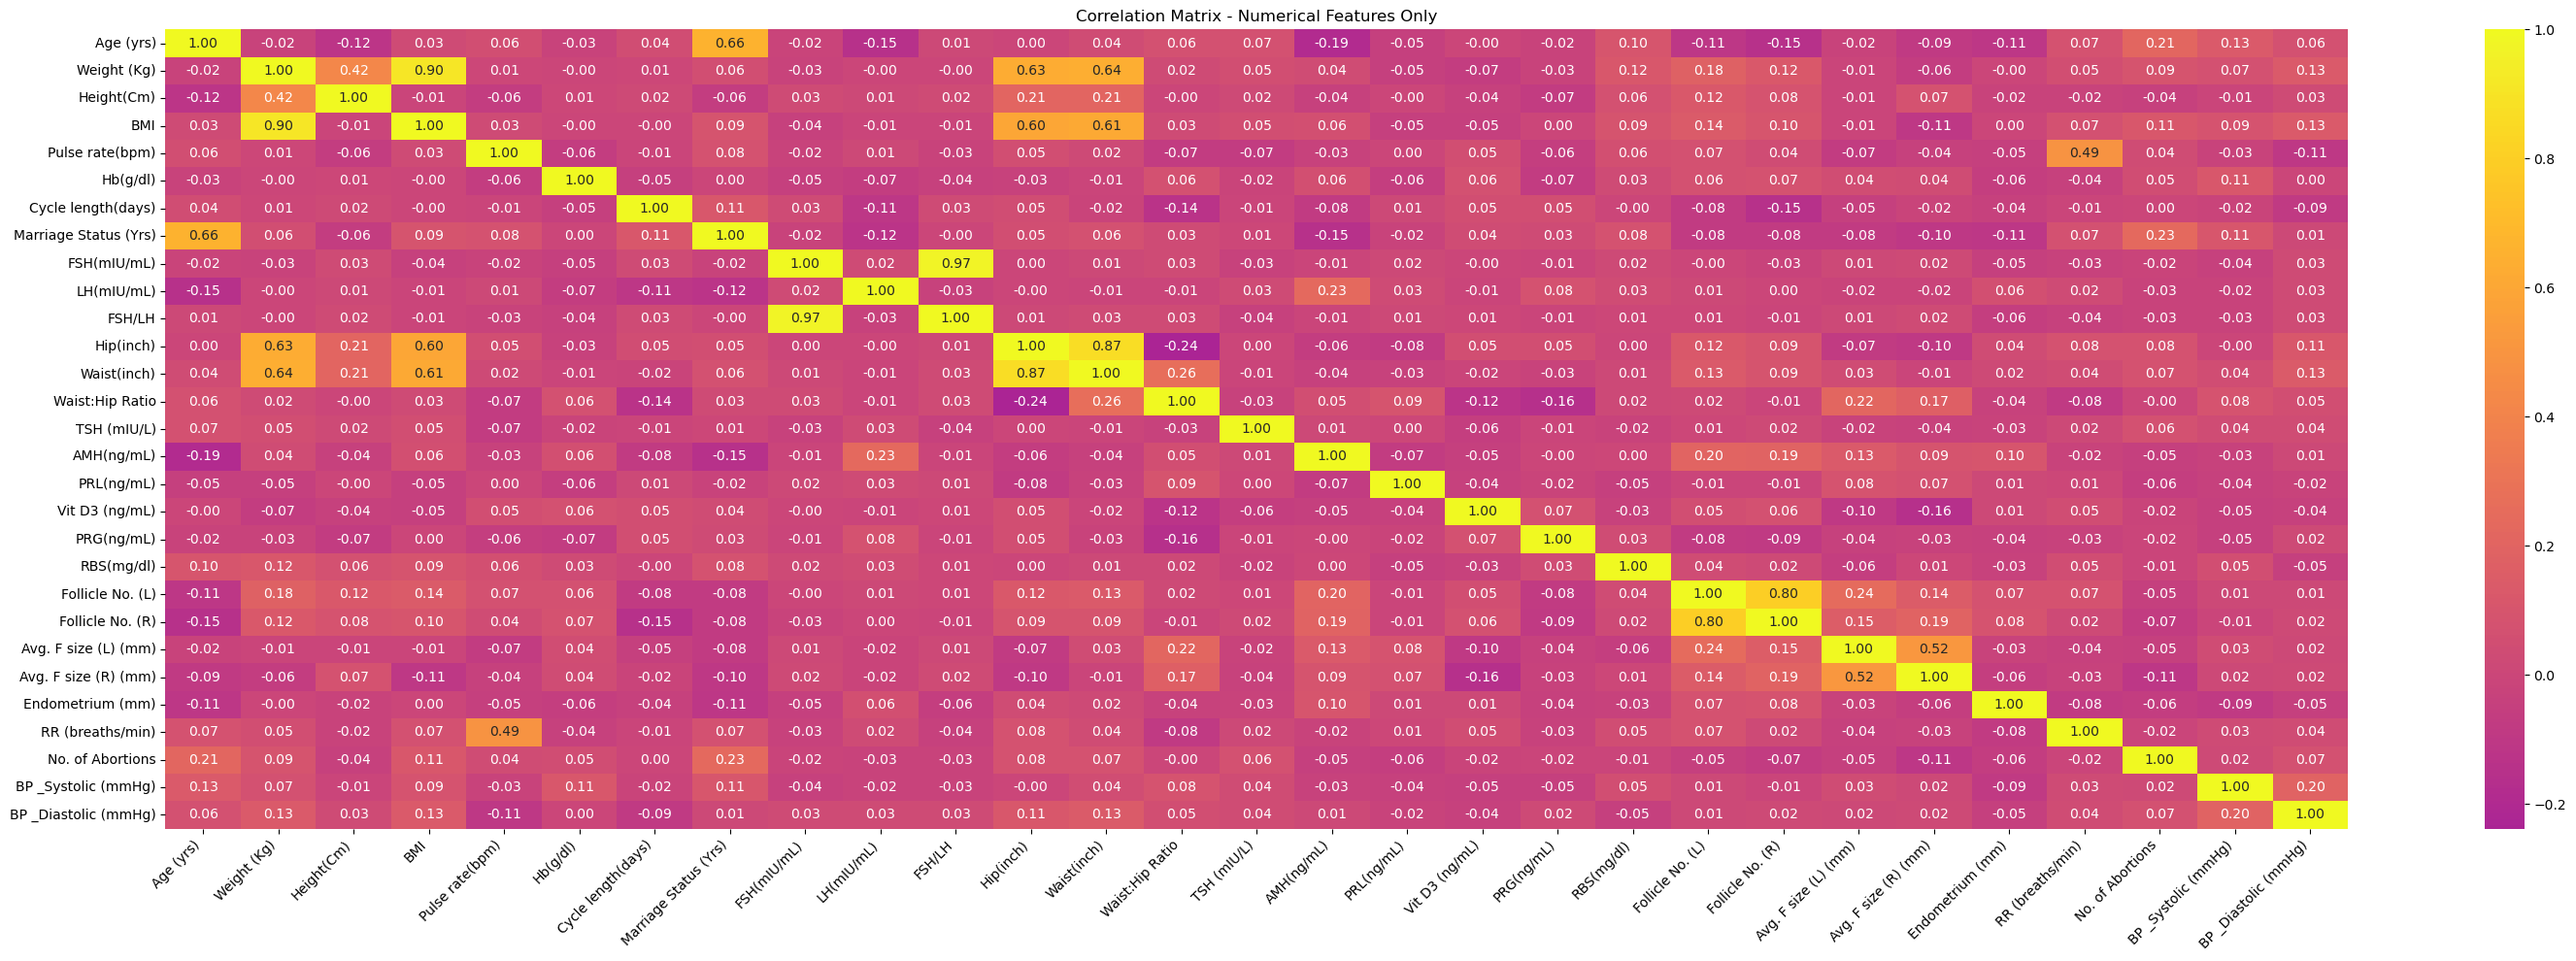

In [29]:
# Plot heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(corr_matrix, cmap="plasma", annot=True, fmt=".2f", center=0)
plt.title("Correlation Matrix - Numerical Features Only")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# Non-Clinical features list
non_clinical_features = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Cycle length(days)',
    'Marriage Status (Yrs)', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
    'Pregnant(Y/N)', 'No. of Abortions', 'Weight gain(Y/N)', 'hair growth(Y/N)',
    'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
    'Reg.Exercise(Y/N)'
]

# Overall features: all except target
overall_features = [col for col in df.columns if col != 'PCOS (Y/N)']

In [31]:
# 2. Split data
X_nc = df[non_clinical_features]
X_all = df[overall_features]

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_nc, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

In [32]:
# 3. Define a function to train and evaluate models
def train_evaluate(model, param_grid, X_train, y_train, X_test, y_test, name):
    # Ensure X_train has string column names
    X_train = X_train.copy()
    X_train.columns = X_train.columns.astype(str)
    X_test = X_test.copy()
    X_test.columns = X_test.columns.astype(str)
    
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=RANDOM_STATE)),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    print(f"\n=== {name} ===")
    print("Best Params:", grid.best_params_)
    preds = best.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, best.predict_proba(X_test)[:, 1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    return best

In [33]:
# 4. Parameter grids
xgb_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6],
    'clf__learning_rate': [0.01, 0.1]
}

rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}

In [34]:
# Non-Clinical
nc_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
nc_xgb_trained = train_evaluate(
    nc_xgb, xgb_params, X_train_nc, y_train_nc, X_test_nc, y_test_nc, 'NC_XGB'
)
joblib.dump(nc_xgb_trained, "NC_XGB_model.joblib")

# Overall
all_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
all_xgb_trained = train_evaluate(
    all_xgb, xgb_params, X_train_all, y_train_all, X_test_all, y_test_all, 'ALL_XGB'
)
joblib.dump(all_xgb_trained, "ALL_XGB_model.joblib")


C:\Users\preet\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\preet\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\preet\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\preet\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\preet\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


=== NC_XGB ===
Best Params: {'clf__learning_rate': 0.01, 'clf__max_depth': 6, 'clf__n_estimators': 200}
Accuracy: 0.839622641509434
ROC-AUC: 0.8422535211267607
Confusion Matrix:
 [[64  7]
 [10 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        71
           1       0.78      0.71      0.75        35

    accuracy                           0.84       106
   macro avg       0.82      0.81      0.81       106
weighted avg       0.84      0.84      0.84       106


=== ALL_XGB ===
Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__n_estimators': 200}
Accuracy: 0.9245283018867925
ROC-AUC: 0.938430583501006
Confusion Matrix:
 [[69  2]
 [ 6 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.94      0.83      0.88        35

    accuracy                           0.92       106
   macro 

C:\Users\preet\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['ALL_XGB_model.joblib']